In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1461451.0,https://www.airbnb.com/rooms/1461451,2.020000e+13,12/18/2023,city scrape,Rental unit in Chicago · ★4.60 · 1 bedroom · 1...,NaN,We are in the far north neighborhood of Chicag...,https://a0.muscache.com/pictures/da1a79e0-ac55...,2907254,...,4.80,4.52,4.65,R21000075752,f,15,0,4,11,1.49
1,1502674.0,https://www.airbnb.com/rooms/1502674,2.020000e+13,12/18/2023,city scrape,Rental unit in Chicago · ★4.79 · 2 bedrooms · ...,NaN,Old Town is the Historic District of Chicago. ...,https://a0.muscache.com/pictures/e02e56c3-f683...,33004,...,4.81,4.97,4.77,2209985,t,5,5,0,0,0.88
2,1554433.0,https://www.airbnb.com/rooms/1554433,2.020000e+13,12/18/2023,city scrape,Bungalow in Chicago · ★4.85 · 1 bedroom · 1 be...,NaN,"Beverly, South in Chicago where you'll find sa...",https://a0.muscache.com/pictures/22698267/9b81...,6088938,...,4.94,4.79,4.87,R17000013891,f,2,0,2,0,1.59
3,2384.0,https://www.airbnb.com/rooms/2384,2.020000e+13,12/18/2023,city scrape,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,NaN,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,...,4.99,4.96,4.94,R17000015609,f,1,0,1,0,2.10
4,1562331.0,https://www.airbnb.com/rooms/1562331,2.020000e+13,12/18/2023,city scrape,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,NaN,Northwest side of Chicago. The neighborhood is...,https://a0.muscache.com/pictures/miso/Hosting-...,3710712,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [ ]:
# Group by 'neighbourhood_cleansed' and count the occurrences
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

# Display the result
print(neighborhood_counts)

neighbourhood_cleansed
Near North Side    1127
West Town           855
Lake View           653
Near West Side      563
Logan Square        491
                   ... 
Gage Park             4
South Deering         3
Mount Greenwood       2
Edison Park           2
Riverdale             1
Name: count, Length: 77, dtype: int64


In [ ]:
# Group by 'neighbourhood_cleansed' and 'superhost' columns and count the occurrences
superhost_counts = df.groupby('neighbourhood_cleansed')['host_is_superhost'].value_counts().unstack()
# Calculate the percentage of superhosts
superhost_counts['superhost_percentage'] = round((superhost_counts['t'] / (superhost_counts['t'] + superhost_counts['f'])) * 100, 2)
# Display the result
print(superhost_counts)

host_is_superhost           f      t  superhost_percentage
neighbourhood_cleansed                                    
Albany Park              29.0   40.0                 57.97
Archer Heights            8.0    NaN                   NaN
Armour Square            42.0   38.0                 47.50
Ashburn                  10.0    4.0                 28.57
Auburn Gresham           23.0    4.0                 14.81
...                       ...    ...                   ...
West Lawn                 6.0    9.0                 60.00
West Pullman             10.0    1.0                  9.09
West Ridge               61.0   52.0                 46.02
West Town               427.0  428.0                 50.06
Woodlawn                145.0   54.0                 27.14

[77 rows x 3 columns]


In [ ]:
# Show top 10 neighbourhoods that have most superhost listings
most_superhost_counts = superhost_counts.sort_values(by='t', ascending=False).head(10)
most_superhost_counts = most_superhost_counts.reset_index()
most_superhost_counts

host_is_superhost,neighbourhood_cleansed,f,t,superhost_percentage
0,West Town,427.0,428.0,50.06
1,Lake View,269.0,383.0,58.74
2,Near North Side,821.0,306.0,27.15
3,Logan Square,218.0,265.0,54.87
4,Lincoln Park,151.0,182.0,54.65
5,Near West Side,382.0,174.0,31.29
6,Loop,335.0,149.0,30.79
7,Lower West Side,120.0,125.0,51.02
8,Near South Side,134.0,118.0,46.83
9,Irving Park,82.0,107.0,56.61


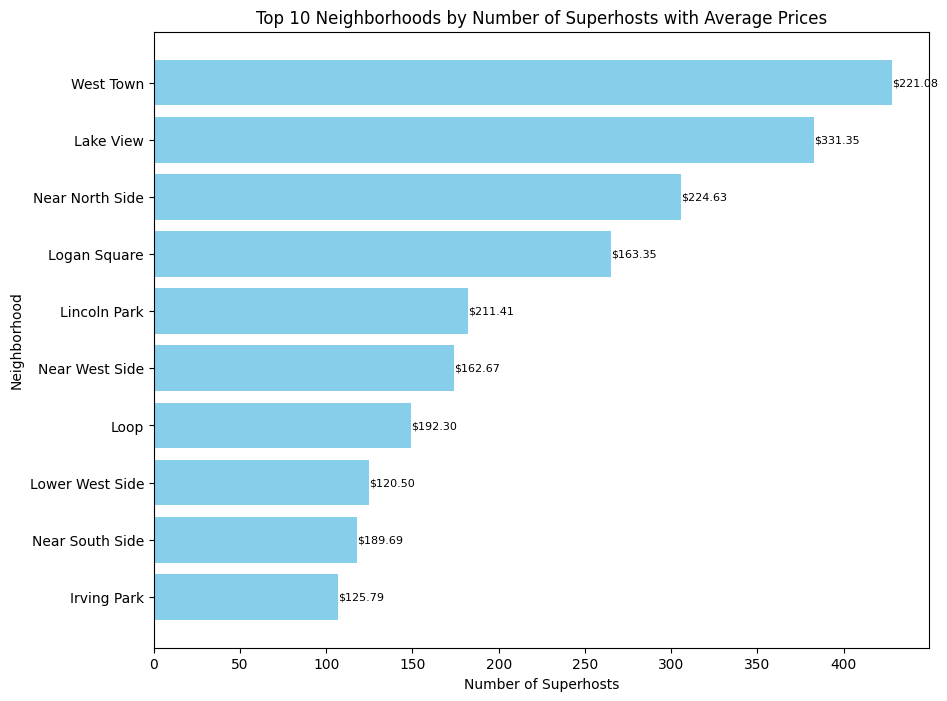

In [ ]:
# Calculate the average price for each neighborhood
average_price_per_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

# Join this with most_superhost_counts DataFrame
most_superhost_counts = most_superhost_counts.join(average_price_per_neighborhood, on='neighbourhood_cleansed')

# Then you plot, with the average price as an annotated value on each bar
plt.figure(figsize=(10, 8))
bars = plt.barh(most_superhost_counts['neighbourhood_cleansed'], most_superhost_counts['t'], color='skyblue')

# Annotate the average prices on the bars
for bar, average_price in zip(bars, most_superhost_counts['price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${average_price:.2f}',
             va='center', ha='left', color='black', fontsize=8)

plt.xlabel('Number of Superhosts')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Number of Superhosts with Average Prices')
plt.gca().invert_yaxis()  # To have the highest percentage on top
plt.show()

In [ ]:
# Sorted neighbourhoods with the their percentage of superhost listings
sorted_superhost_counts = superhost_counts.sort_values(by='superhost_percentage', ascending=False)

# Limit to top 10 neighborhoods
top_10_superhost_neighborhoods = sorted_superhost_counts.reset_index().head(10)

# Display the result
print(top_10_superhost_neighborhoods)

host_is_superhost neighbourhood_cleansed      f      t  superhost_percentage
0                            Forest Glen    3.0    7.0                 70.00
1                         Belmont Cragin   14.0   28.0                 66.67
2                              Hegewisch    2.0    4.0                 66.67
3                           Portage Park   39.0   65.0                 62.50
4                         Jefferson Park   21.0   35.0                 62.50
5                           North Center   52.0   82.0                 61.19
6                              West Lawn    6.0    9.0                 60.00
7                              Lake View  269.0  383.0                 58.74
8                            Albany Park   29.0   40.0                 57.97
9                            Irving Park   82.0  107.0                 56.61


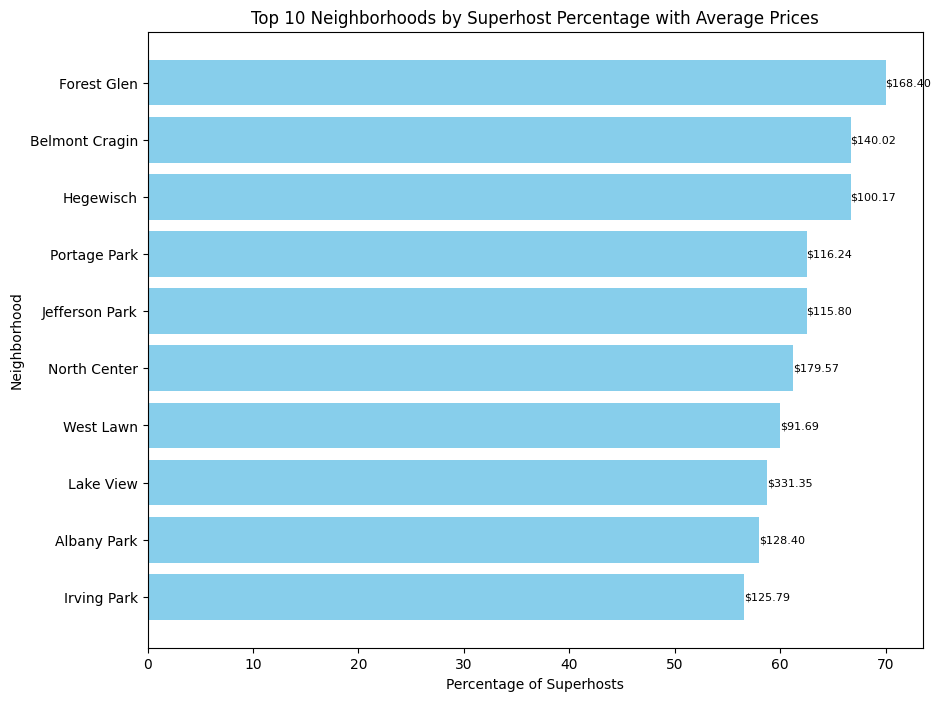

In [ ]:
# Calculate the average price for each neighborhood
average_price_per_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

# Join this with your top_10_superhost_neighborhoods DataFrame
# Ensure your top_10_superhost_neighborhoods DataFrame has 'neighbourhood_cleansed' as a column
top_10_superhost_neighborhoods = top_10_superhost_neighborhoods.join(average_price_per_neighborhood, on='neighbourhood_cleansed')

# Then you plot, with the average price as an annotated value on each bar
plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_superhost_neighborhoods['neighbourhood_cleansed'], top_10_superhost_neighborhoods['superhost_percentage'], color='skyblue')

# Annotate the average prices on the bars
for bar, average_price in zip(bars, top_10_superhost_neighborhoods['price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${average_price:.2f}',
             va='center', ha='left', color='black', fontsize=8)

plt.xlabel('Percentage of Superhosts')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Superhost Percentage with Average Prices')
plt.gca().invert_yaxis()  # To have the highest percentage on top
plt.show()

## Unsupervised Machine Learning:
Clustering latitude and longitude data to identify geographical groupings can be effectively done using algorithms like K-Means. The K-Means algorithm partitions the data into K distinct clusters based on distance to the centroid of a cluster, which is a good choice for geographical data.

In [ ]:
lat_long_df = df[['latitude', 'longitude']]
# Perform K-Means clustering to find 3 clusters
kmeans = KMeans(n_clusters=9, random_state=0).fit(lat_long_df)

# The cluster labels are returned in `kmeans.labels_`
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


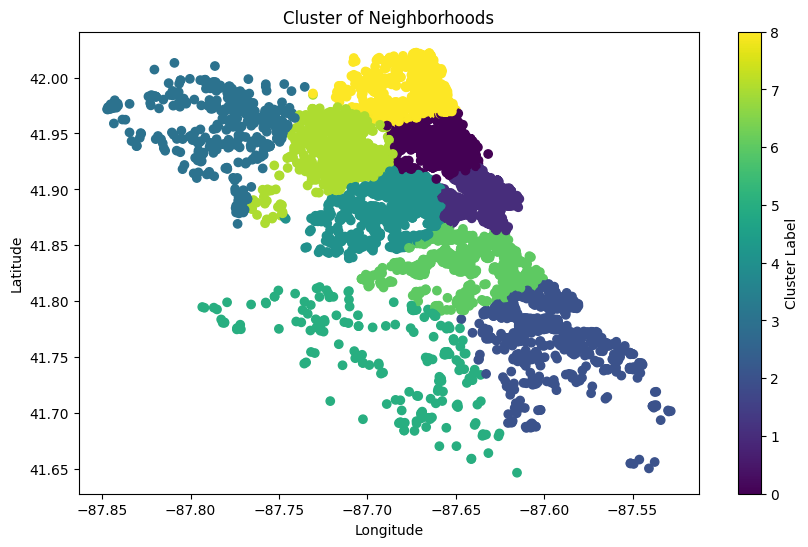

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('Cluster of Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

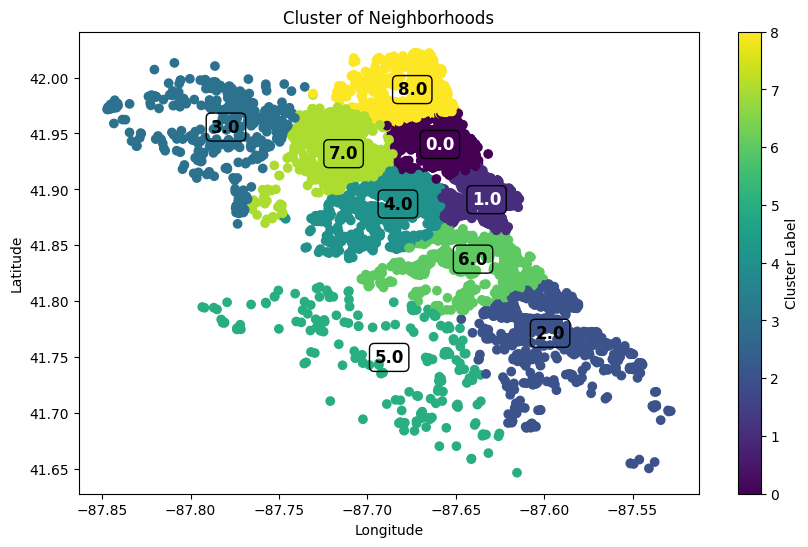

In [ ]:
# Calculate centroids
centroids = df.groupby('cluster')[['latitude', 'longitude']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('Cluster of Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')

# Function to determine text color based on background color intensity
def text_color(background_color):
    return 'white' if np.mean(background_color) < 0.5 else 'black'

# Annotate the centroids
for index, row in centroids.iterrows():
    cluster_color = scatter.to_rgba(row['cluster'])
    plt.annotate(row['cluster'], (row['longitude'], row['latitude']),
                 color=text_color(cluster_color), fontsize=12, ha='center',
                 va='center', weight='bold',
                 bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

In [ ]:
# Now group by the cluster label and list neighborhoods
neighborhoods_in_clusters = df.groupby('cluster')['neighbourhood_cleansed'].unique()

# Display the result
for label, neighborhoods in neighborhoods_in_clusters.items():
    print(f"Cluster {label}: {', '.join(neighborhoods)}")

Cluster 0: Lake View, Lincoln Park, Logan Square, North Center, Uptown, West Town
Cluster 1: Lincoln Park, Near North Side, Near West Side, West Town, Loop, Near South Side
Cluster 2: Hyde Park, Chatham, Pullman, Woodlawn, Kenwood, Washington Park, South Shore, Grand Boulevard, Hegewisch, Greater Grand Crossing, Englewood, Calumet Heights, Roseland, South Chicago, Avalon Park, South Deering, Burnside, East Side
Cluster 3: Portage Park, Forest Glen, Dunning, Austin, Belmont Cragin, Norwood Park, Jefferson Park, Edison Park, Albany Park, Montclare, Ohare, Irving Park
Cluster 4: West Town, Lower West Side, Humboldt Park, East Garfield Park, South Lawndale, Near West Side, North Lawndale, West Garfield Park, Logan Square, Austin
Cluster 5: Beverly, Morgan Park, West Lawn, West Elsdon, Garfield Ridge, Ashburn, West Pullman, Archer Heights, Englewood, Chicago Lawn, Mount Greenwood, West Englewood, Washington Heights, Auburn Gresham, Brighton Park, Clearing, Gage Park, Riverdale, New City, Ro

In [ ]:
# Group by 'cluster' and 'superhost' columns and count the occurrences
cluster_superhost_counts = df.groupby('cluster')['host_is_superhost'].value_counts().unstack()
# Calculate the percentage of superhosts
cluster_superhost_counts['superhost_percentage'] = round((cluster_superhost_counts['t'] / (cluster_superhost_counts['t'] + cluster_superhost_counts['f'])) * 100, 2)
# Display the result
print(cluster_superhost_counts)

host_is_superhost     f    t  superhost_percentage
cluster                                           
0                   525  660                 55.70
1                  1518  625                 29.16
2                   575  231                 28.66
3                   185  204                 52.44
4                   798  662                 45.34
5                   148   42                 22.11
6                   583  446                 43.34
7                   452  528                 53.88
8                   405  325                 44.52


In [ ]:
cluster_df = cluster_superhost_counts.reset_index()
cluster_df

host_is_superhost,cluster,f,t,superhost_percentage
0,0,525,660,55.70
1,1,1518,625,29.16
2,2,575,231,28.66
3,3,185,204,52.44
4,4,798,662,45.34
5,5,148,42,22.11
6,6,583,446,43.34
7,7,452,528,53.88
8,8,405,325,44.52


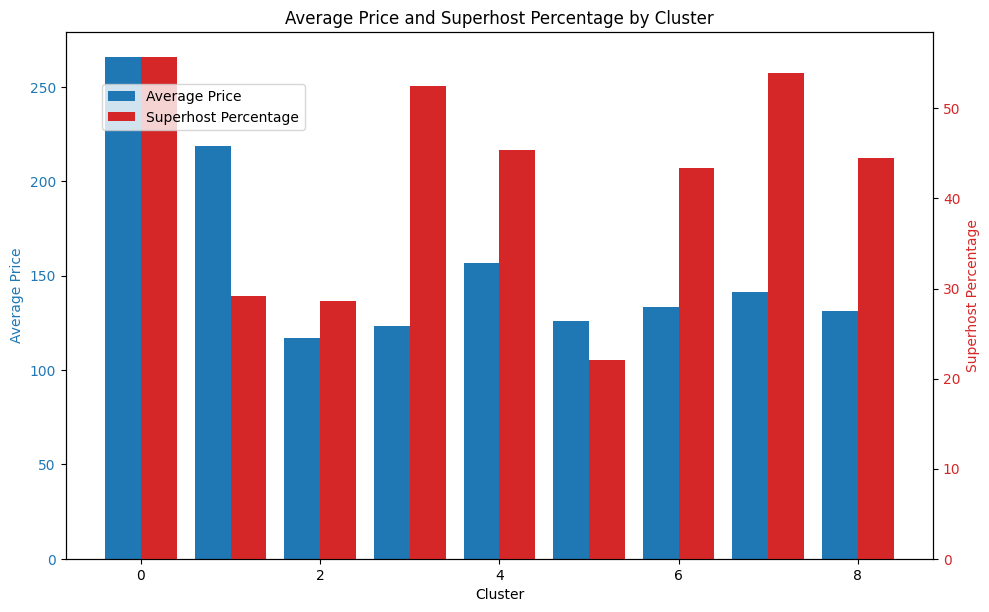

In [ ]:
# Calculate the average price per cluster
average_price_per_cluster = df.groupby('cluster')['price'].mean()

# Calculate the superhost percentage for each cluster
superhost_percentage_per_cluster = df.groupby('cluster')['host_is_superhost'].apply(
    lambda x: (x == 't').sum() / x.count() * 100)

# Create a new DataFrame for plotting
cluster_summary_df = pd.DataFrame({
    'Cluster': average_price_per_cluster.index,
    'Average Price': average_price_per_cluster.values,
    'Superhost Percentage': superhost_percentage_per_cluster.values
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the 'Average Price' on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Price', color=color)
ax1.bar(cluster_summary_df['Cluster'] - 0.2, cluster_summary_df['Average Price'], width=0.4, color=color, label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the 'Superhost Percentage'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Superhost Percentage', color=color)
ax2.bar(cluster_summary_df['Cluster'] + 0.2, cluster_summary_df['Superhost Percentage'], width=0.4, color=color, label='Superhost Percentage')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
fig.tight_layout()
plt.title('Average Price and Superhost Percentage by Cluster')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

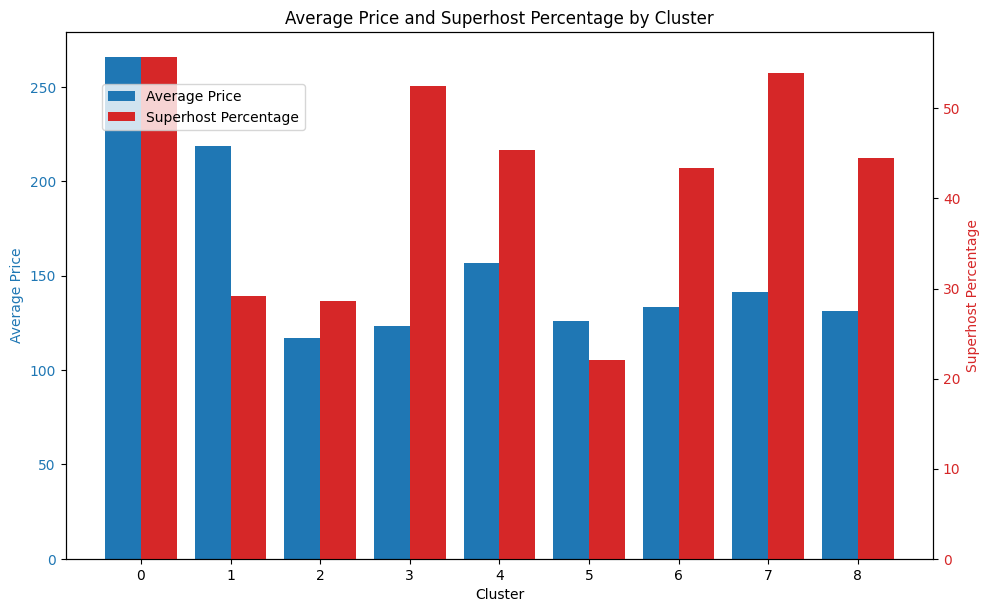

In [ ]:
# Calculate the average price per cluster
average_price_per_cluster = df.groupby('cluster')['price'].mean()

# Calculate the superhost percentage for each cluster
superhost_percentage_per_cluster = df.groupby('cluster')['host_is_superhost'].apply(
    lambda x: (x == 't').sum() / x.count() * 100)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the x-axis for all clusters from 0 to 8
clusters = range(0, 9)

# Plot the 'Average Price' on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Price', color=color)
ax1.bar([c - 0.2 for c in clusters], average_price_per_cluster.reindex(clusters, fill_value=0), width=0.4, color=color, label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(clusters)  # Setting x-ticks positions

# Create a second y-axis to plot the 'Superhost Percentage'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Superhost Percentage', color=color)
ax2.bar([c + 0.2 for c in clusters], superhost_percentage_per_cluster.reindex(clusters, fill_value=0), width=0.4, color=color, label='Superhost Percentage')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
fig.tight_layout()
plt.title('Average Price and Superhost Percentage by Cluster')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()